In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../tools/')

In [3]:
import tools

# Load Data

In [4]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
x_train = train.drop(['SalePrice', 'Id'],axis=1)
y_train = train.SalePrice
x_test = test.drop(['Id'],axis=1)

In [5]:
prc = tools.Preprocess(x_train,x_test,y_train)

# Analyse

## Overview

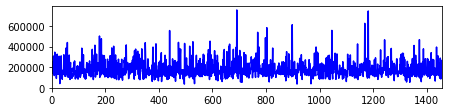

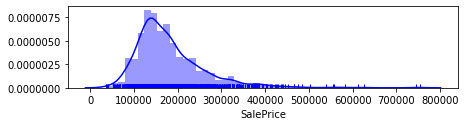

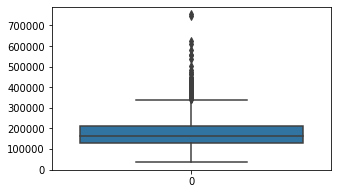

SalePrice has 0 NaNs (0.00%).
Skewness : 1.88
Kurtosis : 6.54
----------------------------------------------------------------------------------------------------


In [6]:
prc.viewY(dtype='numeric',significance=0.01)

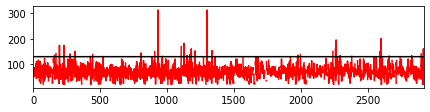

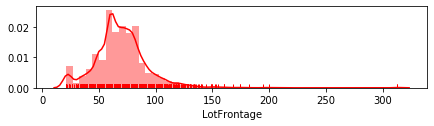

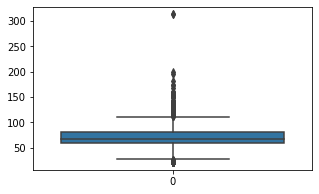

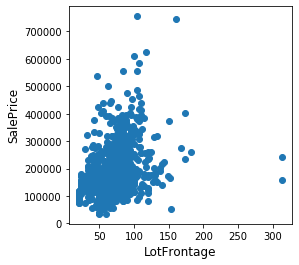

LotFrontage has 486 NaNs (16.65%).
Correlation Coefficient (LotFrontage vs target): 0.352
Skewness : 1.50
Kurtosis : 11.30
Number of anomaly scores over threshold(1.0%) : 40 / 2919
Border line :  129.0
----------------------------------------------------------------------------------------------------


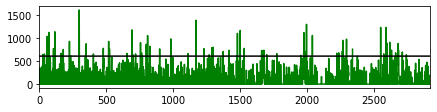

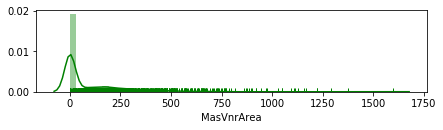

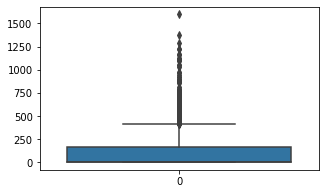

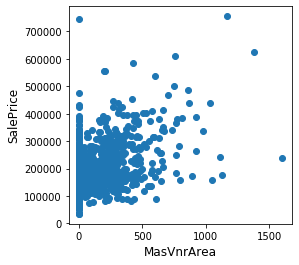

MasVnrArea has 23 NaNs (0.79%).
Correlation Coefficient (MasVnrArea vs target): 0.477
Skewness : 2.60
Kurtosis : 9.25
Number of anomaly scores over threshold(1.0%) : 72 / 2919
Border line :  604.0
----------------------------------------------------------------------------------------------------


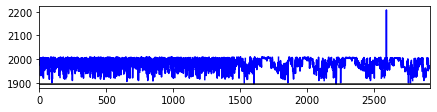

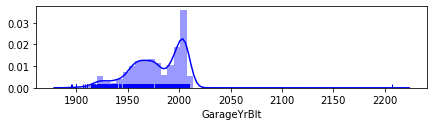

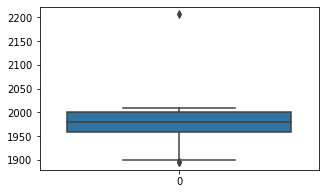

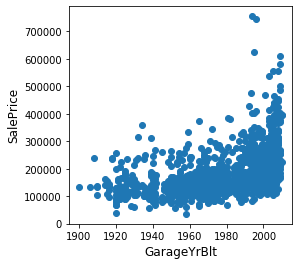

GarageYrBlt has 159 NaNs (5.45%).
Correlation Coefficient (GarageYrBlt vs target): 0.486
Skewness : -0.38
Kurtosis : 1.81
Number of anomaly scores over threshold(1.0%) : 11 / 2919
Border line :  1895.0
----------------------------------------------------------------------------------------------------


In [7]:
prc.viewF(dtype='float',significance=0.01)

## Missing Data

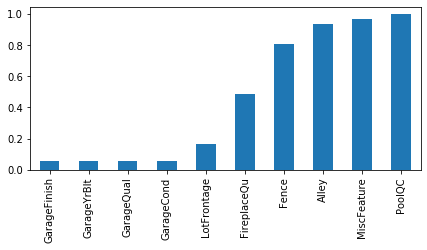

In [8]:
prc.NANs(top=10,bar=True,plot=False,get_return=False)

## Skewness

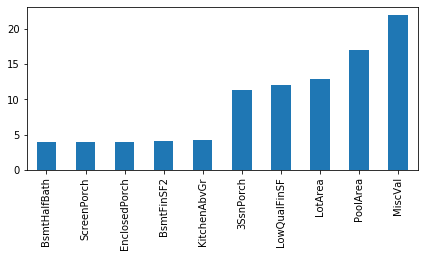

In [9]:
prc.Skews(top=10,bar=True,plot=False,get_return=False)

## Kurtosis

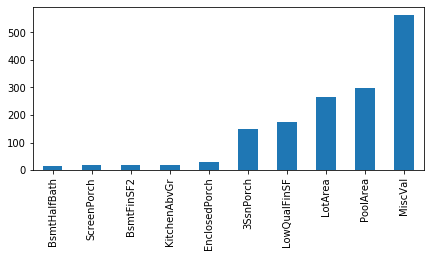

In [10]:
prc.Kurts(top=10,bar=True,plot=False,get_return=False)

## Correlation Coefficient

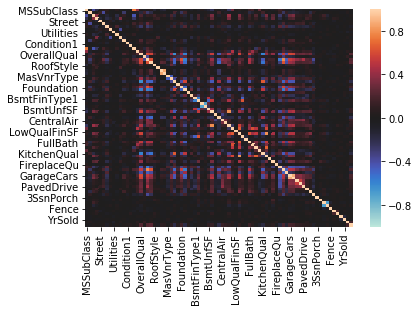

In [20]:
prc.CorrF(view=True)

# Preprocess

## Fill NAN

In [11]:
# x_train_filled,x_test_filled, _ = prc.fill(
#     fill_method_num='median',
#     fill_method_object='Missing',
#     inplace=False,
#     get_return=True)
prc.fill(
    fill_method_num='median',
    fill_method_object='Missing',
    inplace=True,
    get_return=False)

Missing NAN of Numeric types is filled by : median.
Missing NAN of Numeric types is filled by : Missing.


In [12]:
prc.x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,...,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,...,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,...,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,...,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal


In [13]:
print(prc.x_train.shape)
print(prc.x_test.shape)
print(prc.missing.sum())

(1460, 79)
(1459, 79)
0


## Encode to numeric

In [14]:
# x_train_encoded, x_test_encoded, _ = prc.encode(
#     method_enc='label', inplace=False, get_return=True)
prc.encode(method_enc='label', inplace=True, get_return=False)

In [15]:
prc.x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,4,65.0,8450,1,1,3,3,0,4,...,0,0,3,2,1,0,2,2008,9,4
1,20,4,80.0,9600,1,1,3,3,0,2,...,0,0,3,2,1,0,5,2007,9,4
2,60,4,68.0,11250,1,1,0,3,0,4,...,0,0,3,2,1,0,9,2008,9,4
3,70,4,60.0,9550,1,1,0,3,0,0,...,0,0,3,2,1,0,2,2006,9,0
4,60,4,84.0,14260,1,1,0,3,0,2,...,0,0,3,2,1,0,12,2008,9,4


In [16]:
print(prc.x_train.shape)
print(prc.x_test.shape)
print(prc.x_all.dtypes.unique())

(1460, 79)
(1459, 79)
[dtype('int64') dtype('float64')]
